# 1. What are all the possible data preparation steps should be done?

## On a predictive modeling project, such as classification or regression, raw data tuypcally cannot be used directly.
- Machine learning algorithms require data to be numbers.
- Some machine learning algorithms impose requirements on the data.
- Statistical noise and errors in the data may need to be corrected.
- Complex nonlinear relationships may be teased out of the data.

As such, the raw data must be pre-processed prior to being used to fit and evaluate a machine learning model. This step in a predictive modeling project is referred to as “data preparation“, although it goes by many other names, such as “data wrangling“, “data cleaning“, “data pre-processing” and “feature engineering“. Some of these names may better fit as sub-tasks for the broader data preparation process.

- Data Cleaning: Identifying and correcting mistakes or errors in the data.
- Feature Selection: Identifying those input variables that are most relevant to the task.
- Data Transforms: Changing the scale or distribution of variables.
- Feature Engineering: Deriving new variables from available data.
- Dimensionality Reduction: Creating compact projections of the data.

Each of these tasks is a whole field of study with specialized algorithms.


# 2. Is this classification use case in imbalanced cndition? If yes how to handle it?

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv('dataset/trainbase.csv')
df_test = pd.read_csv('dataset/testbase.csv')
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,13170.0,2.021011e+10,4.474680e+03,2.021010e+10,2.021010e+10,2.021011e+10,2.021011e+10,2.021012e+10
creditlimit,13170.0,2.070004e+07,2.957703e+07,3.000000e+06,5.000000e+06,9.000000e+06,2.200000e+07,1.000000e+09
n_cards,13170.0,2.503493e+00,1.012502e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
os_balance,13170.0,1.160585e+07,2.378763e+07,0.000000e+00,1.998926e+06,4.705553e+06,1.064840e+07,7.980586e+08
os_billing,13170.0,8.115265e+06,1.771476e+07,2.004300e+04,8.147260e+05,3.154396e+06,7.464537e+06,6.280000e+08
tot_cash_advance_trx,13170.0,7.273773e+04,5.812124e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.873341e+07
tot_retail_trx,13170.0,2.006182e+06,7.723783e+06,-1.566720e+07,0.000000e+00,2.040815e+05,1.412833e+06,2.850000e+08
remaining_unpaid_balance,13170.0,8.181807e+06,1.925655e+07,0.000000e+00,0.000000e+00,2.753848e+06,7.185789e+06,4.440000e+08
rasio_pembayaranpayment_ratio,13170.0,6.579761e+01,8.554434e+02,-1.813800e+04,0.000000e+00,2.660000e+01,1.000000e+02,6.898300e+04
overlimit_pct,13170.0,3.363252e+00,9.175405e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.240000e+00,1.900000e+02


0    12008
1     1162
Name: good_bad_flag, dtype: int64


0    0.911769
1    0.088231
Name: good_bad_flag, dtype: float64


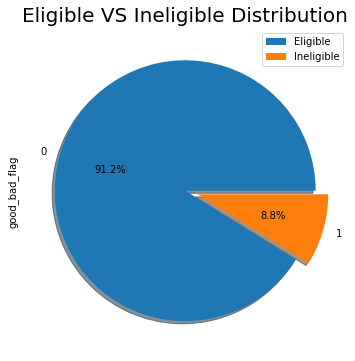

In [6]:
print(df_train['good_bad_flag'].value_counts())
print('\n')
print(df_train['good_bad_flag'].value_counts(normalize=True))

df_train["good_bad_flag"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Eligible VS Ineligible Distribution",fontsize=20)
plt.legend(["Eligible", "Ineligible"])
plt.show()

### Presence of 'Imbalanced cndition' 

This dataset has 1162 ineligible out of 12008 users. The dataset is highly unbalanced, the positive class (Bad Flag) account for 8.8% of all users. Most of the user are eligible. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are ineligible (BAD Flag). But we don't want our model to assume, we want our model to detect patterns that give signs of ineligible!

In [12]:
# check null
df_train.isna().sum()

id                                          0
creditlimit                                 0
n_cards                                     0
os_balance                                  0
os_billing                                  0
tot_cash_advance_trx                        0
tot_retail_trx                              0
remaining_unpaid_balance                    0
branchcode                                 86
rasio_pembayaranpayment_ratio               0
overlimit_pct                               0
payment_ration_3months                      0
payment_ration_6months                      0
deliquncy_score                             0
good_bad_flag                               0
loan_tenure                                 0
total_trx                                   0
remaining_statement_balance_per_n_cards     0
remaining_statement_balance_per_limit       0
total_trx_per_limit                         0
tot_trx_3months_per_limit                   0
tot_trx_6months_per_limit         

<AxesSubplot:>

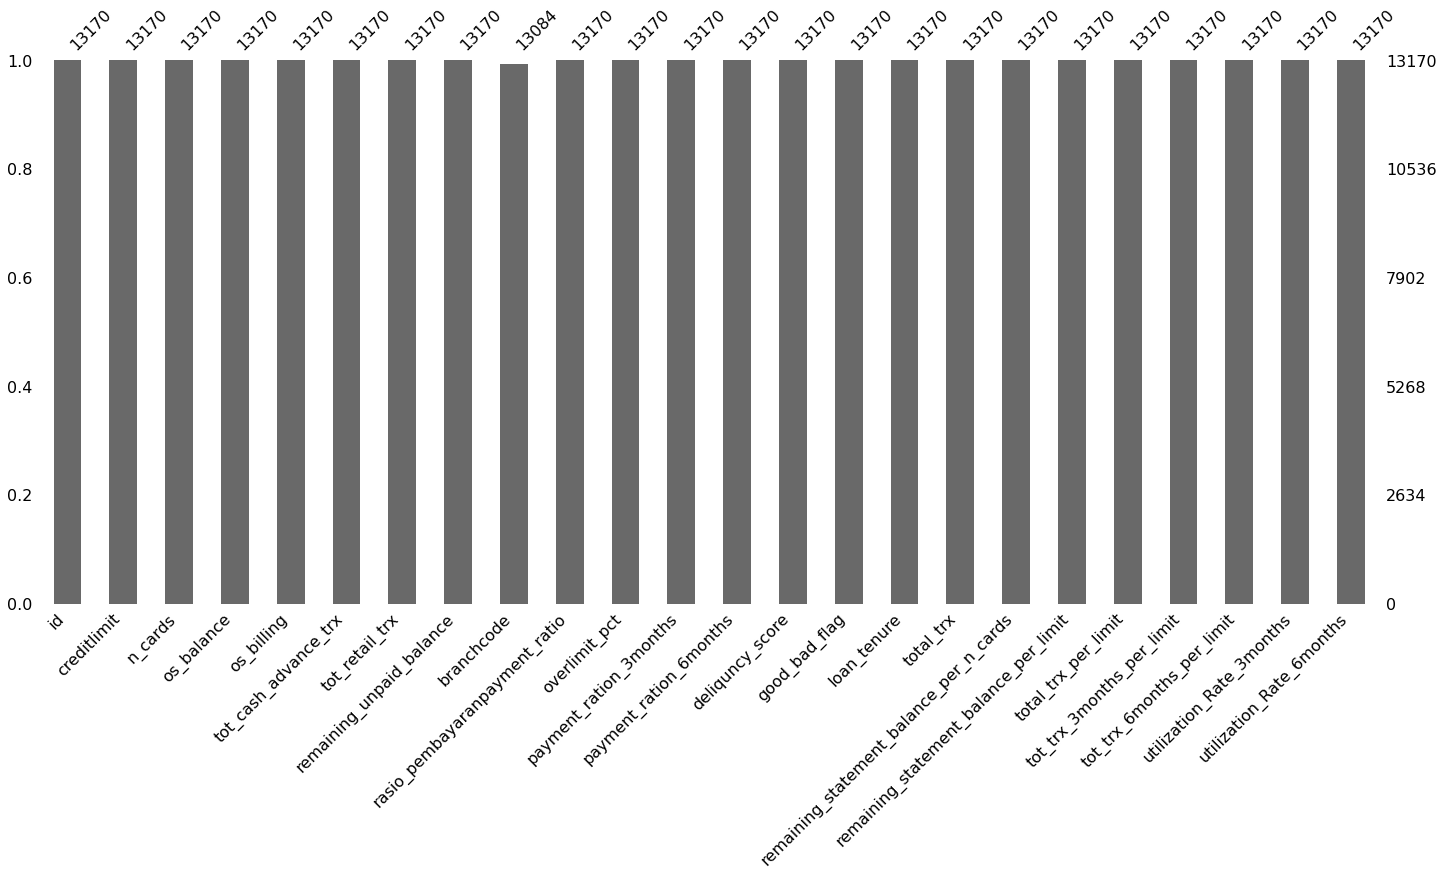

In [15]:
import missingno as msno
msno.bar(df_train)

<AxesSubplot:>

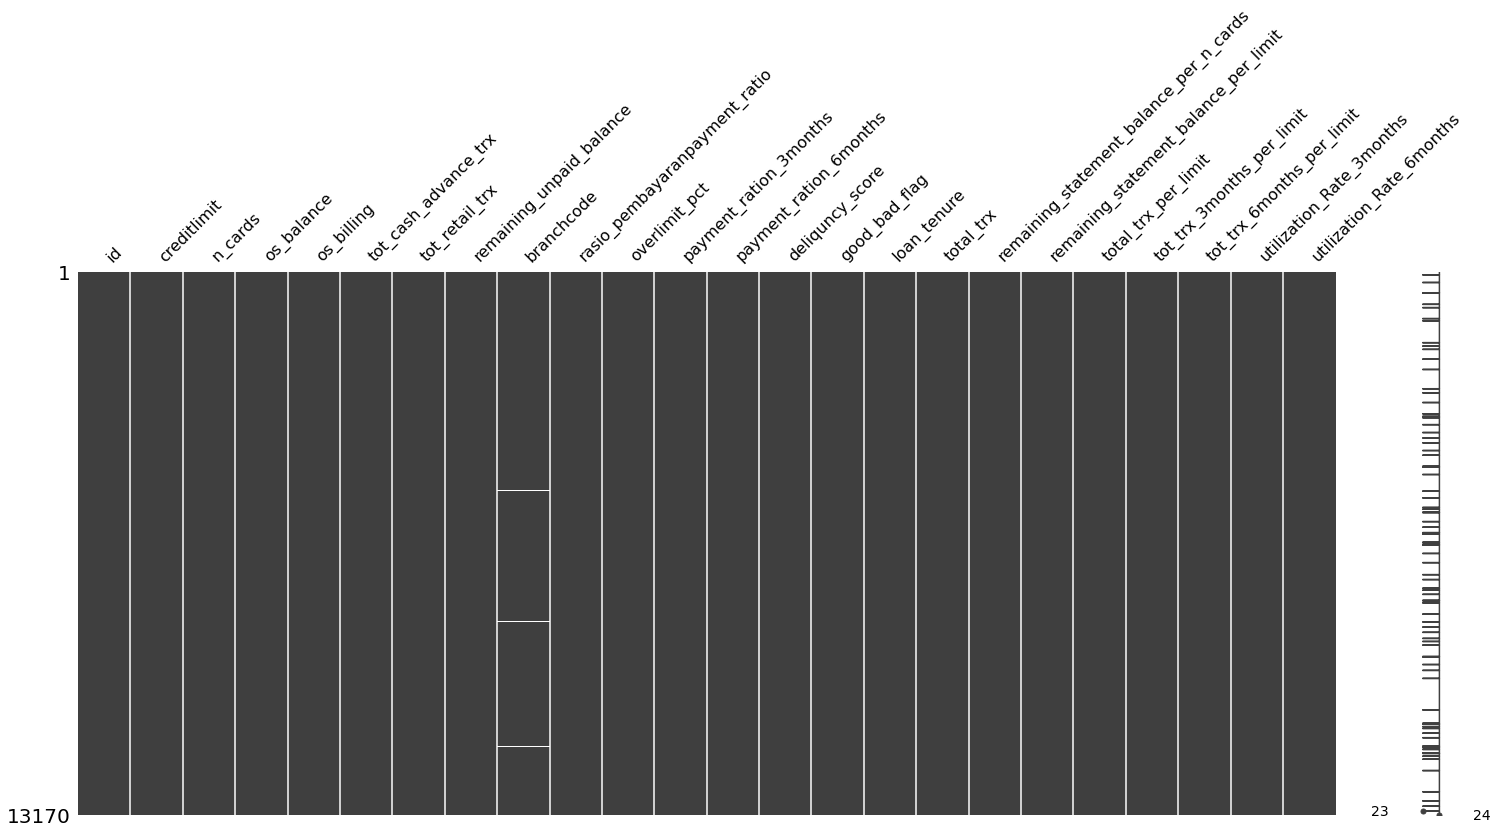

In [16]:
msno.matrix(df_train)

In [18]:
df_train['branchcode'].unique()

array(['I', 'A', 'G', 'B', 'E', 'K', 'F', 'C', 'J', 'H', nan, 'D'],
      dtype=object)

In [19]:
df_train.branchcode = df_train.branchcode.replace({"A": 1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7, "H" : 8, "I" : 9,"K": 11, "J": 10})

In [20]:
df_train['branchcode']=df_train['branchcode'].fillna(df_train['branchcode'].mode()[0])

In [21]:
df_train.isna().sum()

id                                         0
creditlimit                                0
n_cards                                    0
os_balance                                 0
os_billing                                 0
tot_cash_advance_trx                       0
tot_retail_trx                             0
remaining_unpaid_balance                   0
branchcode                                 0
rasio_pembayaranpayment_ratio              0
overlimit_pct                              0
payment_ration_3months                     0
payment_ration_6months                     0
deliquncy_score                            0
good_bad_flag                              0
loan_tenure                                0
total_trx                                  0
remaining_statement_balance_per_n_cards    0
remaining_statement_balance_per_limit      0
total_trx_per_limit                        0
tot_trx_3months_per_limit                  0
tot_trx_6months_per_limit                  0
utilizatio

### Now our data is null free

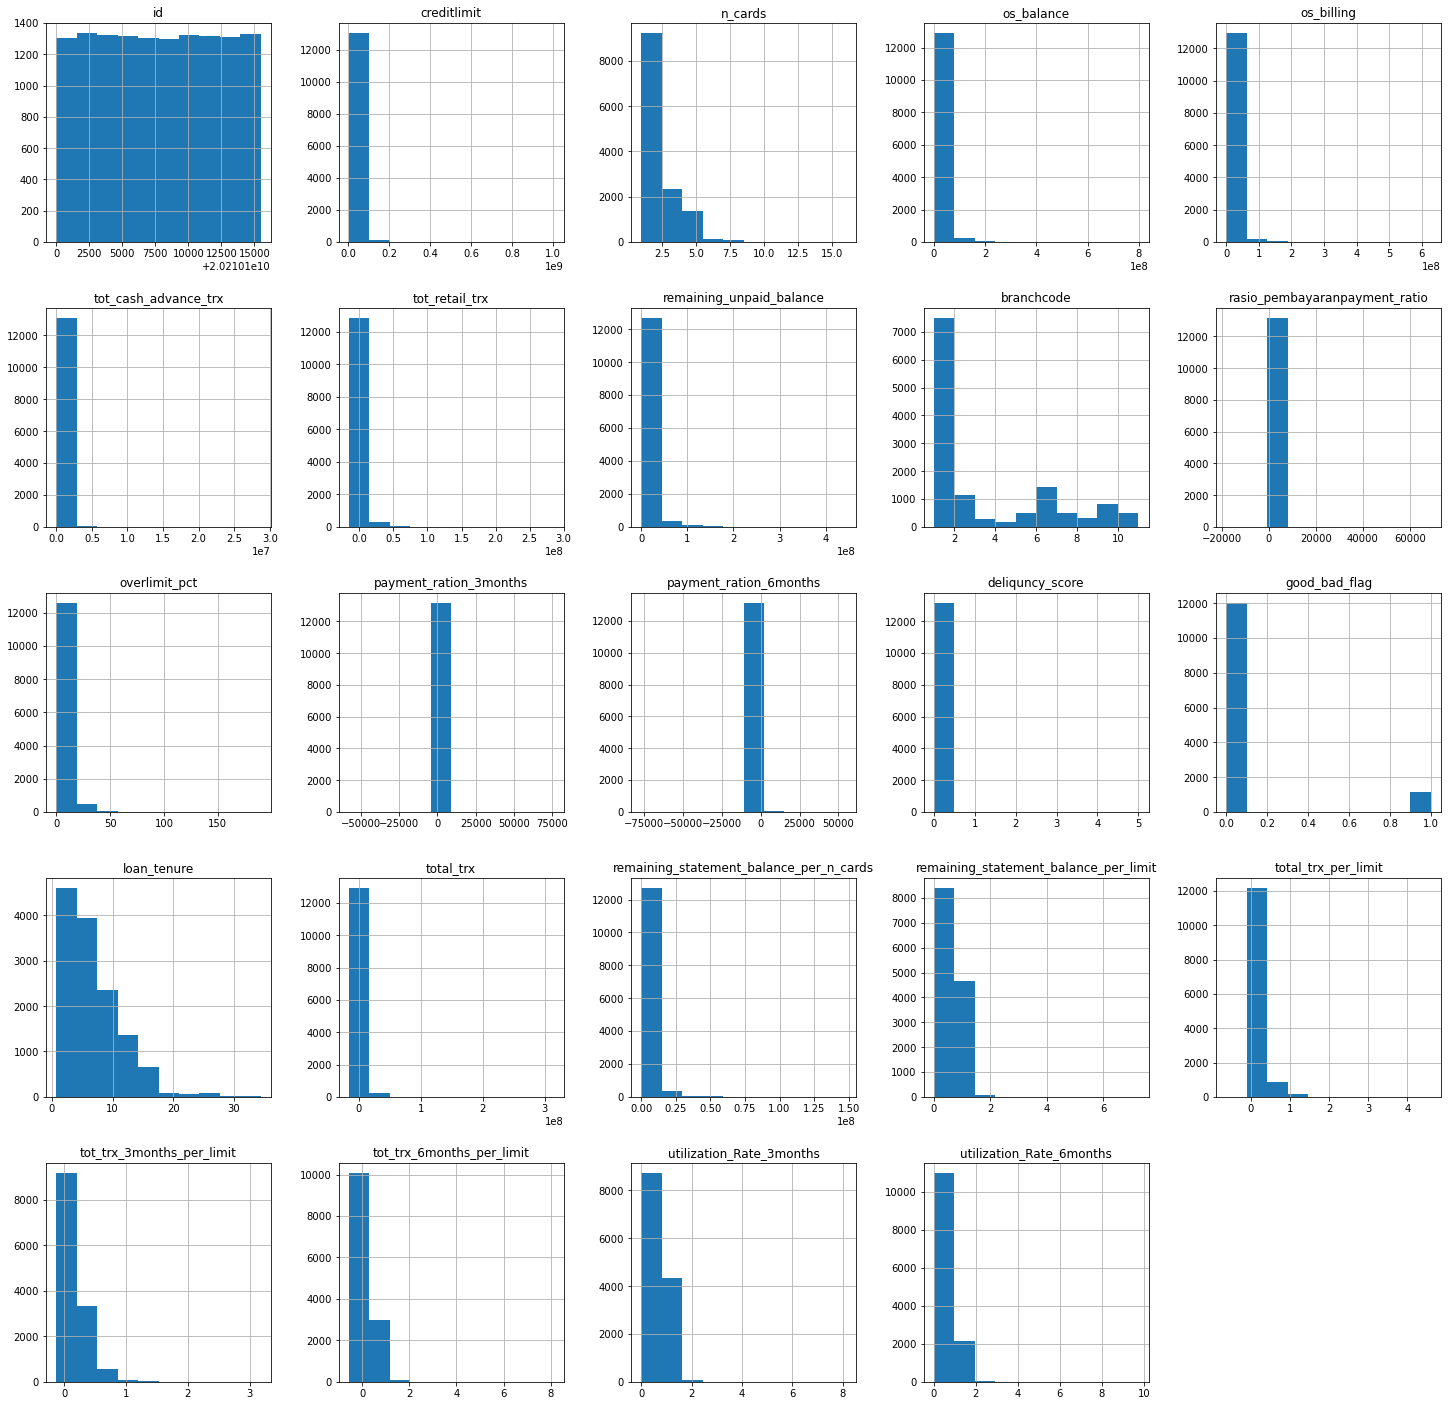

In [24]:
df_train.hist(figsize = (25,25))
plt.show()

In [29]:
# Reset the index

df_train.reset_index(inplace = True , drop = True)

In [28]:
df_train.isna().sum()

id                                         0
creditlimit                                0
n_cards                                    0
os_balance                                 0
os_billing                                 0
tot_cash_advance_trx                       0
tot_retail_trx                             0
remaining_unpaid_balance                   0
branchcode                                 0
rasio_pembayaranpayment_ratio              0
overlimit_pct                              0
payment_ration_3months                     0
payment_ration_6months                     0
deliquncy_score                            0
good_bad_flag                              0
loan_tenure                                0
total_trx                                  0
remaining_statement_balance_per_n_cards    0
remaining_statement_balance_per_limit      0
total_trx_per_limit                        0
tot_trx_3months_per_limit                  0
tot_trx_6months_per_limit                  0
utilizatio

#### Scale Amount Feature
 It is a good idea to scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like a Amount has ranged from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like os_balance and os_balance in Dollars must be brought down to a common scale before feeding it to the ML algorithm
This will result in a better prediction model.

PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) except for time and amount.

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled.

### 1. Scale amount by Log
Scaling using the log: There are two main reasons to use logarithmic scales in charts and graphs.

- The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.
- The second is to show per cent change or multiplicative factors. 

In [31]:
df_train.head(5)

,id,creditlimit,n_cards,os_balance,os_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,branchcode,rasio_pembayaranpayment_ratio,...,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_n_cards,remaining_statement_balance_per_limit,total_trx_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_Rate_3months,utilization_Rate_6months
0,20210100001,7000000.0,2,36158,23437.0,0.0,94.0,26323.0,9.0,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,20210100002,10000000.0,2,268691,254564.0,0.0,1012.0,0.0,1.0,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,20210100003,28000000.0,3,6769149,4159779.0,0.0,0.0,0.0,1.0,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,20210100004,21000000.0,4,3496732,111231.0,0.0,2536660.0,581334.0,7.0,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,20210100005,10000000.0,2,9402085,6099283.0,0.0,2666558.0,5951865.0,1.0,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [44]:
df_train['os_balance_log'] = np.log(df_train.os_balance + 0.0001)

### 2. Scale amount by Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

𝑧=(𝑥𝑖−𝜇)/𝜎

In [45]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df_train['os_balance_scaled'] = ss.fit_transform(df_train['os_billing'].values.reshape(-1,1))

### 3. Scale amount by Normalization¶
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

𝑥𝑛𝑜𝑟𝑚=(𝑥𝑖−𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥−𝑥𝑚𝑖𝑛)

In [46]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df_train['os_balance_minmax'] = mm.fit_transform(df_train['os_billing'].values.reshape(-1,1))

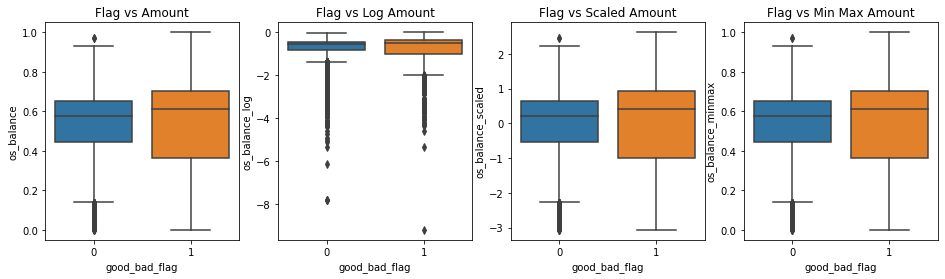

In [48]:
#Feature engineering to a better visualization of the values
import seaborn as sns
# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="good_bad_flag",y="os_balance",data=df_train, ax = axs[0])
axs[0].set_title("Flag vs Amount")

sns.boxplot(x ="good_bad_flag",y="os_balance_log",data=df_train, ax = axs[1])
axs[1].set_title("Flag vs Log Amount")

sns.boxplot(x ="good_bad_flag",y="os_balance_scaled",data=df_train, ax = axs[2])
axs[2].set_title("Flag vs Scaled Amount")

sns.boxplot(x ="good_bad_flag",y="os_balance_minmax",data=df_train, ax = axs[3])
axs[3].set_title("Flag vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

#### Hightlights

We can see a slight difference in the log amount of our two Flag.
The balance of not eligible credit are higher than normal transactions, but normal balance have the highest values.
By seeing the above three graphs, I think scaling the amount by log will best suit for our model.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df_train['branchcode'].unique()

array([ 9.,  1.,  7.,  2.,  5., 11.,  6.,  3., 10.,  8.,  4.])

In [54]:
df_train.isna().sum()


id                                             0
creditlimit                                    0
n_cards                                        0
os_balance                                     0
os_billing                                     0
tot_cash_advance_trx                           0
tot_retail_trx                                 0
remaining_unpaid_balance                       0
branchcode                                     0
rasio_pembayaranpayment_ratio                  0
overlimit_pct                                  0
payment_ration_3months                         0
payment_ration_6months                         0
deliquncy_score                                0
good_bad_flag                                  0
loan_tenure                                  521
total_trx                                   4273
remaining_statement_balance_per_n_cards        0
remaining_statement_balance_per_limit      10559
total_trx_per_limit                        13075
tot_trx_3months_per_

In [60]:
df_train['loan_tenure'].fillna(df_train['loan_tenure'].mode()[0], inplace=True) 

In [61]:
df_train['total_trx'].fillna(df_train['total_trx'].mode()[0], inplace=True) 

In [63]:
df_train['remaining_statement_balance_per_limit'].fillna(df_train['remaining_statement_balance_per_limit'].mode()[0], inplace=True) 

In [64]:
df_train['total_trx_per_limit'].fillna(df_train['total_trx_per_limit'].mode()[0], inplace=True) 

In [65]:
df_train.isna().sum()

id                                         0
creditlimit                                0
n_cards                                    0
os_balance                                 0
os_billing                                 0
tot_cash_advance_trx                       0
tot_retail_trx                             0
remaining_unpaid_balance                   0
branchcode                                 0
rasio_pembayaranpayment_ratio              0
overlimit_pct                              0
payment_ration_3months                     0
payment_ration_6months                     0
deliquncy_score                            0
good_bad_flag                              0
loan_tenure                                0
total_trx                                  0
remaining_statement_balance_per_n_cards    0
remaining_statement_balance_per_limit      0
total_trx_per_limit                        0
tot_trx_3months_per_limit                  0
tot_trx_6months_per_limit                  0
utilizatio

In [69]:
X = df_train.drop(['amount_log','os_balance_log','os_balance_scaled','os_balance_minmax','id','utilization_Rate_3months','good_bad_flag','utilization_Rate_6months','tot_trx_6months_per_limit','payment_ration_3months','payment_ration_6months','rasio_pembayaranpayment_ratio'],axis=1)
y = df_train['good_bad_flag']

In [70]:
X.head(5)

,creditlimit,n_cards,os_balance,os_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,branchcode,overlimit_pct,deliquncy_score,loan_tenure,total_trx,remaining_statement_balance_per_n_cards,remaining_statement_balance_per_limit,total_trx_per_limit,tot_trx_3months_per_limit
0,2.757572,2,0.021901,2.308783,0.0,94.0,26323.0,9.0,0.0,0,1.006335,1.513675,13161.5,-3.514728,-8.517218,0.011719
1,2.779949,2,0.319240,2.521512,0.0,1012.0,0.0,1.0,0.0,0,1.000000,1.934385,0.0,-3.514728,-8.517218,0.000000
2,2.841871,3,0.602256,2.723994,0.0,0.0,0.0,1.0,0.0,0,0.865004,2.239939,0.0,-3.514728,-8.517218,0.040518
3,2.824952,4,0.223033,2.452682,0.0,2536660.0,581334.0,7.0,0.0,0,1.093016,2.691003,145333.5,-3.514728,-8.517218,0.055971
4,2.779949,2,0.636920,2.748794,0.0,2666558.0,5951865.0,1.0,0.0,0,-0.671414,2.694384,2975932.5,-3.514728,-8.517218,0.323027


In [71]:
X.isna().sum()

creditlimit                                0
n_cards                                    0
os_balance                                 0
os_billing                                 0
tot_cash_advance_trx                       0
tot_retail_trx                             0
remaining_unpaid_balance                   0
branchcode                                 0
overlimit_pct                              0
deliquncy_score                            0
loan_tenure                                0
total_trx                                  0
remaining_statement_balance_per_n_cards    0
remaining_statement_balance_per_limit      0
total_trx_per_limit                        0
tot_trx_3months_per_limit                  0
dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [73]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (9219, 16)
y_train -  (9219,)
X_test -  (3951, 16)
y_test -  (3951,)


In [74]:
from sklearn.linear_model import LogisticRegression 

### Baseline for models
We will train four types of classifiers and decide which classifier will be more effective in credit scoring.

Let's Discuss Next Steps -
- 1 Classification Models

    - Logistic Regression
    - Decision Trees
    - Random Forest
    - Naive Bayes Classifier
- 2 Class Imbalance Solutions

    - Under Sampling
    - Over Sampling
    - SMOTE
    - ADASYN
    - 3 Metrics

- 3 Accuracy Score
    - Confusion Matrix
    - Precision Score
    - Recall Score
    - ROC_AUC
    - F1 Score

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [76]:
y_pred = logreg.predict(X_test)

In [77]:
from sklearn import metrics

In [78]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3598
           1       0.22      0.03      0.05       353

    accuracy                           0.90      3951
   macro avg       0.57      0.51      0.50      3951
weighted avg       0.85      0.90      0.87      3951



In [79]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.90357
AUC : 0.51016
Precision : 0.22000
Recall : 0.03116
F1 : 0.05459




In [80]:
pd.Series(y_pred).value_counts()

0    3901
1      50
dtype: int64

In [81]:
pd.Series(y_test).value_counts()

0    3598
1     353
Name: good_bad_flag, dtype: int64

There are originally 353 fraud transactions and our model predicted only 43 fraud transaction. So the accuracy of our model should be  50/353 , right...

In [82]:
50/353

0.141643059490085

So 14.18% should be our accuracy.

In [84]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix


array([[3559,   39],
       [ 342,   11]])

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

In reference of our case:

Recall (True Positive Rate): % of all fraudulent transactions cases captured.

Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?

Accuracy: How correct the model is (misleading for fraud/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

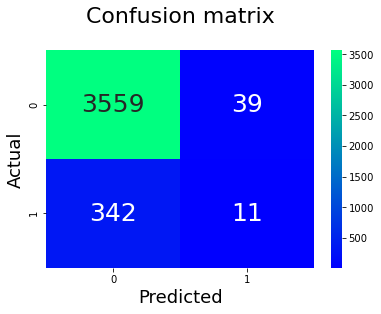

In [85]:
# Heatmap for Confusion Matrix
import seaborn as sns
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

There are 14 transaction recognised as True Postive, means they are orignally fraud transactions and our model precited them as BAD.

True Negative - 3559 (truely saying negative - genuine transaction correctly identified as Good)

True Postive - 11 (truely saying positive - fraud transaction correctly identified as BAD)

False Negative - 342 ( falsely saying negative - fraud transaction incorrectly identified as good)

False Positive - 29 ( falsely saying positive - genuine transaction incorrectly identified as BAD)

We already know that we have 342 bad transaction in our test dataset, but our model predicted only 14 fraud transaction. So the real accuracy of our model is  11/353

In [90]:
11/353

0.031161473087818695

So, 3.11% is the real accuracy of our model, which is nothing but the Recall Score. So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

Receiver Operating Characteristics (ROC)
The ROC is a performance measurement for classification problems at various thresholds. It is essentially a probability curve, and the higher the Area Under the Curve (AUC) score the better the model is at predicting fraudulent/non-fraudulent transactions.

It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class.

Let's talk about some definitions first:

Sensitivity or Recall
The sensitivity of a model is defined by the proportion of actual positives that are classified as Positives , i.e = TP / ( TP + FN )

Recall or Sensitivity=(𝑇𝑃)/(𝑇𝑃+𝐹𝑁)

Specificity
The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )

Specificity=(𝑇𝑁)/(𝑇𝑁+𝐹𝑃)

As we can see that both are independent of each other and lie in teo different quadrants , we can understand that they are inversely related to each other. Thus as Sensitivity goes up , Specificity goes down and vice versa.

### ROC CURVE
It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class

In [92]:
metrics.roc_auc_score(y_test , y_pred) 

0.5101610589452434

In [93]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.78259572, 0.21740428],
       [0.5847787 , 0.4152213 ],
       [0.53091057, 0.46908943],
       ...,
       [0.97879489, 0.02120511],
       [0.99618512, 0.00381488],
       [0.55456881, 0.44543119]])

AUC -  0.5101610589452434 



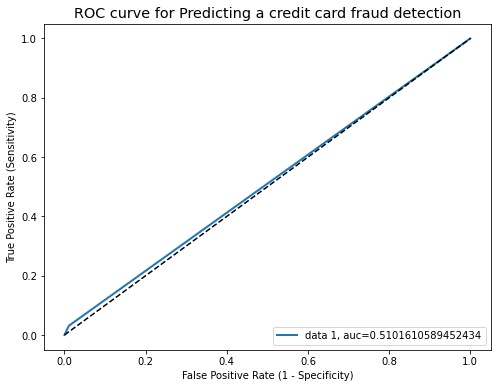

In [94]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.055


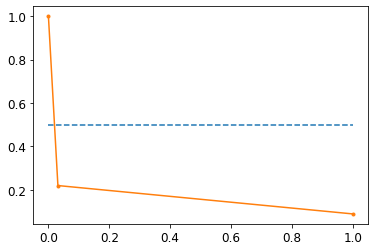

In [95]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

### Class Imbalance
Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. If one applies classifiers on the dataset, they are likely to predict everything as the majority class. This was often regarded as a problem in learning from highly imbalanced datasets.

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

### Logistic Regression with Random Undersampling technique

In [99]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 8410, 1: 809})
Resampled dataset shape Counter({0: 809, 1: 809})


In [100]:
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [101]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))

Accuracy :0.54847
AUC : 0.63967
Precision : 0.13514
Recall : 0.75071
F1 : 0.22904


AUC -  0.6396676151528942 



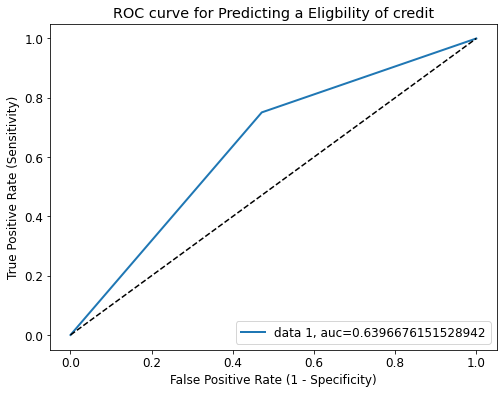

In [102]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Eligbility of credit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.229


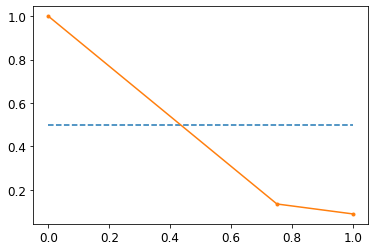

In [103]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

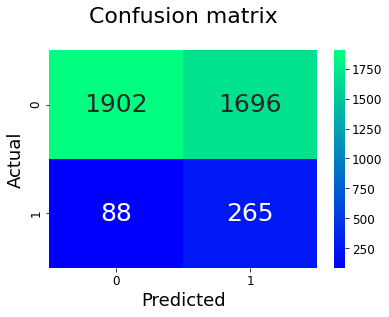

In [104]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

### Logistic Regression with Random Oversampling technique

In [106]:
from imblearn.over_sampling import RandomOverSampler

In [107]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 8410, 1: 809})
Resampled dataset shape Counter({0: 8410, 1: 8410})


In [108]:
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))


Accuracy :0.50721
AUC : 0.62340
Precision : 0.12652
Recall : 0.76487
F1 : 0.21713


AUC -  0.6234034646254529 



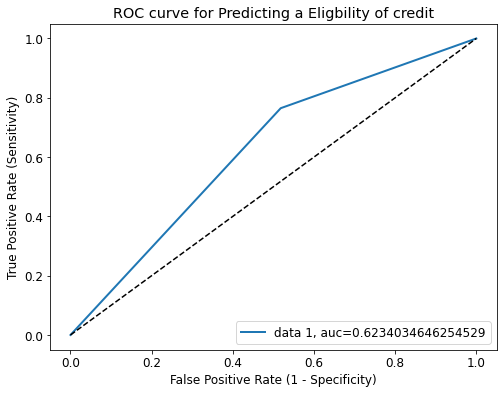

In [109]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Eligbility of credit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.217


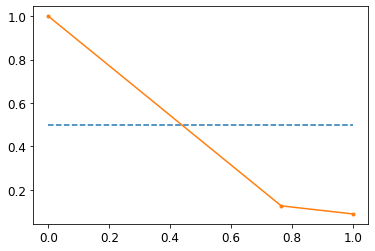

In [110]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

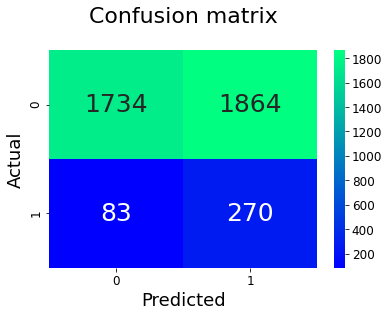

In [111]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)



plt.show()

In [112]:
from imblearn.over_sampling import SMOTE, ADASYN

In [113]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 8410, 1: 809})
Resampled dataset shape Counter({0: 8410, 1: 8410})


In [115]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.57353
AUC : 0.65215
Precision : 0.14194
Recall : 0.74788
F1 : 0.23859


AUC -  0.6521477937853418 



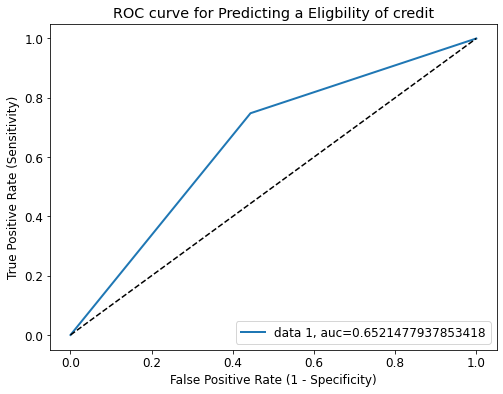

In [116]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Eligbility of credit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.239


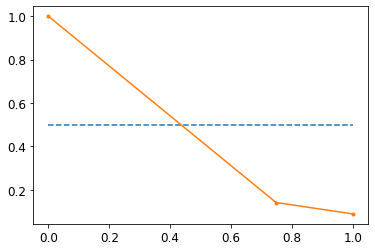

In [117]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

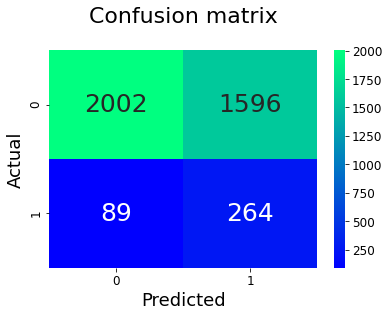

In [118]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)


plt.show()

In [119]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 8410, 1: 809})
Resampled dataset shape Counter({0: 8410, 1: 8219})


In [122]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))

Accuracy :0.54417
AUC : 0.65340
Precision : 0.14263
Recall : 0.74788
F1 : 0.23956


AUC -  0.6533984886158032 



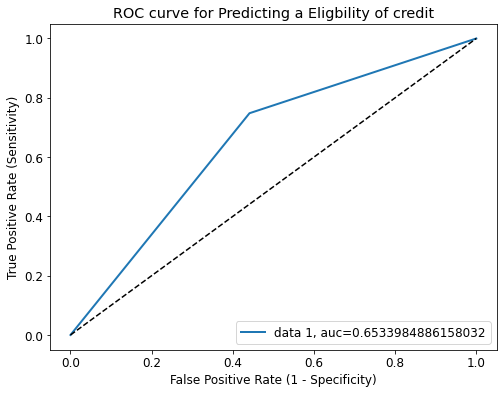

In [123]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Eligbility of credit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.240


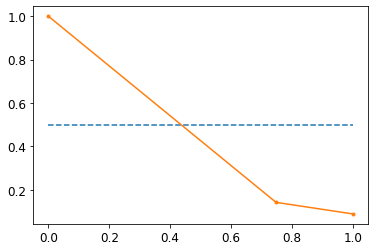

In [124]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

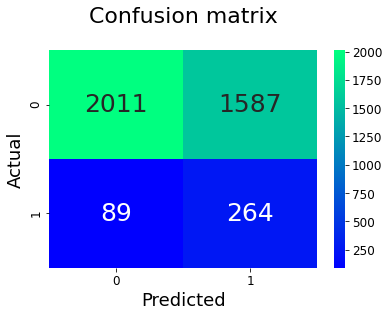

In [125]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)


plt.show()

### Spatial nature of class imbalance


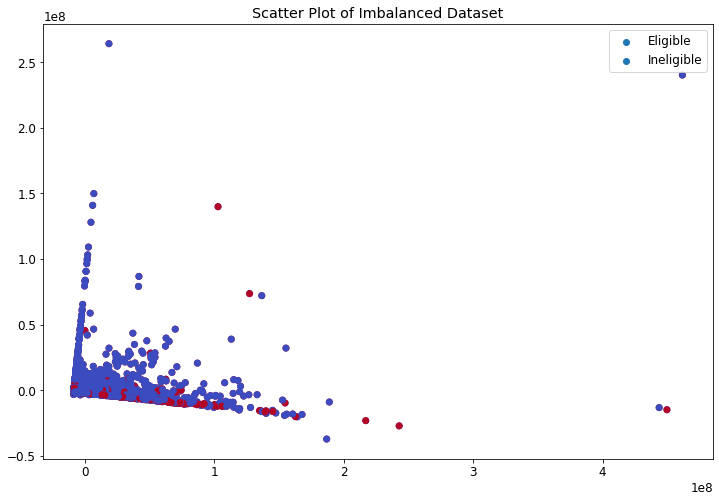

In [128]:
from sklearn.decomposition import PCA
X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X_train)
# Generate and plot a synthetic imbalanced classification dataset
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 0), label='Eligible', cmap='coolwarm', linewidths=1)
plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 1), label='Ineligible', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

Distribution of balaced dataset
Finally, a scatter plot of the transformed dataset is created.

It shows many more examples in the minority class created along the lines between the original examples in the minority class.

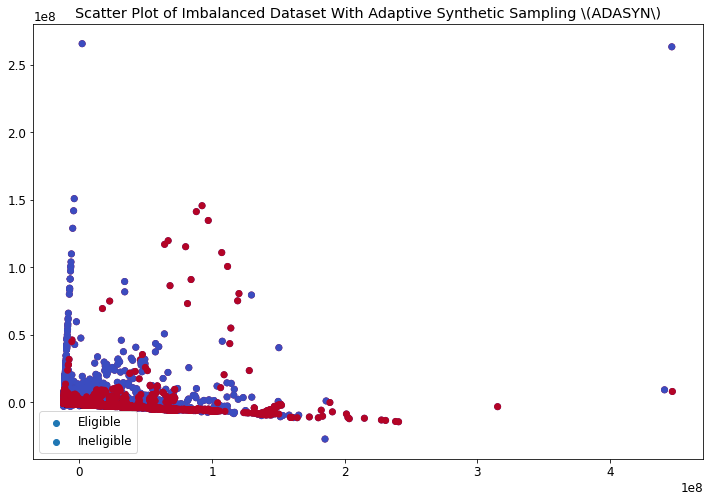

In [129]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_smote)

# Oversample and plot imbalanced dataset with ADASYN
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_smote == 0), cmap='coolwarm', label='Eligible', linewidths=1)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_smote == 1), cmap='coolwarm', label='Ineligible', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset With Adaptive Synthetic Sampling \(ADASYN\)")
plt.legend()
plt.show()

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)
        
        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        
        plt.legend(loc=4)
        plt.plot([0,1], [0,1], 'k--' )
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for Predicting a Eligbility of credit')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.show()

Model Name : LR imbalance
Train Accuracy :0.90693
Test Accuracy :0.90357
Train AUC : 0.51775
Test AUC : 0.51016
Train Precision : 0.30081
Test Precision : 0.22000
Train Recall : 0.04574
Test Recall : 0.03116
Train F1 : 0.07940
Test F1 : 0.05459
Confusion Matrix : 
 [[3559   39]
 [ 342   11]]




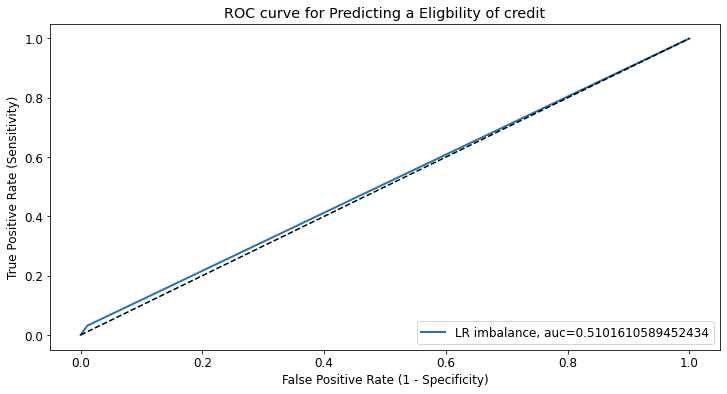

Model Name : LR Undersampling
Train Accuracy :0.64277
Test Accuracy :0.54847
Train AUC : 0.64277
Test AUC : 0.63967
Train Precision : 0.61402
Test Precision : 0.13514
Train Recall : 0.76885
Test Recall : 0.75071
Train F1 : 0.68277
Test F1 : 0.22904
Confusion Matrix : 
 [[1902 1696]
 [  88  265]]




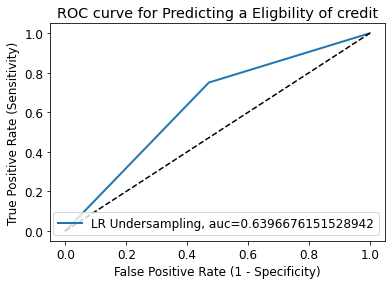

Model Name : LR Oversampling
Train Accuracy :0.63121
Test Accuracy :0.50721
Train AUC : 0.63121
Test AUC : 0.62340
Train Precision : 0.60015
Test Precision : 0.12652
Train Recall : 0.78633
Test Recall : 0.76487
Train F1 : 0.68073
Test F1 : 0.21713
Confusion Matrix : 
 [[1734 1864]
 [  83  270]]




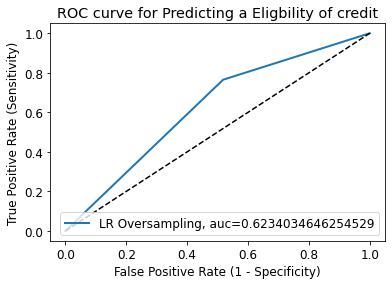

Model Name : LR SMOTE
Train Accuracy :0.65844
Test Accuracy :0.57353
Train AUC : 0.65844
Test AUC : 0.65215
Train Precision : 0.62804
Test Precision : 0.14194
Train Recall : 0.77717
Test Recall : 0.74788
Train F1 : 0.69469
Test F1 : 0.23859
Confusion Matrix : 
 [[2002 1596]
 [  89  264]]




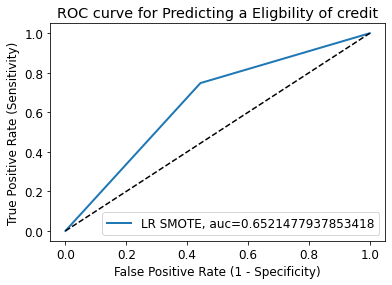

Model Name : LR ADASYN
Train Accuracy :0.65626
Test Accuracy :0.57580
Train AUC : 0.65757
Test AUC : 0.65340
Train Precision : 0.62300
Test Precision : 0.14263
Train Recall : 0.77126
Test Recall : 0.74788
Train F1 : 0.68925
Test F1 : 0.23956
Confusion Matrix : 
 [[2011 1587]
 [  89  264]]




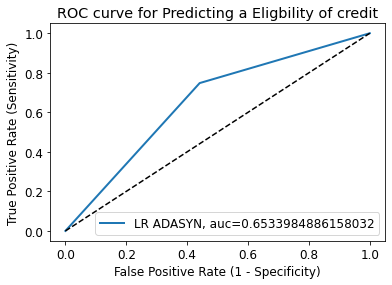

In [131]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'), X_train,y_train,X_test,y_test))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_rus,y_train_rus,X_test,y_test))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_ros,y_train_ros,X_test,y_test))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :0.91066
Train AUC : 1.00000
Test AUC : 0.55110
Train Precision : 1.00000
Test Precision : 0.50000
Train Recall : 1.00000
Test Recall : 0.11331
Train F1 : 1.00000
Test F1 : 0.18476
Confusion Matrix : 
 [[3558   40]
 [ 313   40]]




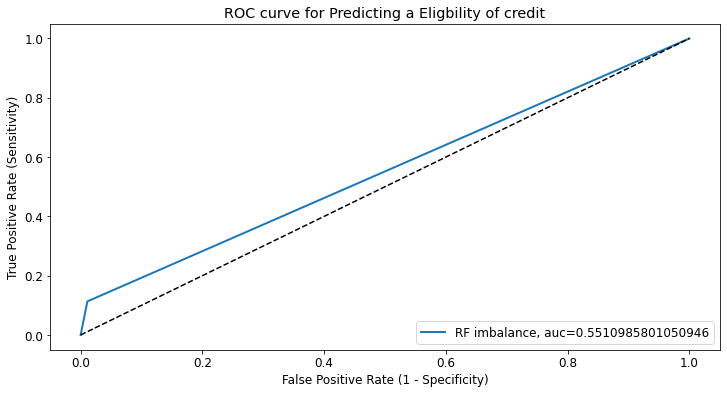

Model Name : RF Undersampling
Train Accuracy :1.00000
Test Accuracy :0.74487
Train AUC : 1.00000
Test AUC : 0.76794
Train Precision : 1.00000
Test Precision : 0.23090
Train Recall : 1.00000
Test Recall : 0.79603
Train F1 : 1.00000
Test F1 : 0.35796
Confusion Matrix : 
 [[2662  936]
 [  72  281]]




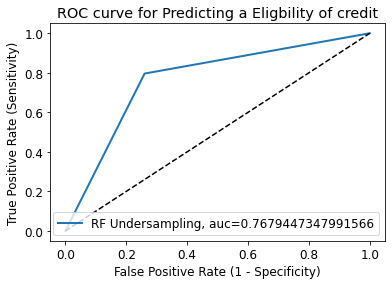

Model Name : RF Oversampling
Train Accuracy :1.00000
Test Accuracy :0.90154
Train AUC : 1.00000
Test AUC : 0.59719
Train Precision : 1.00000
Test Precision : 0.40816
Train Recall : 1.00000
Test Recall : 0.22663
Train F1 : 1.00000
Test F1 : 0.29144
Confusion Matrix : 
 [[3482  116]
 [ 273   80]]




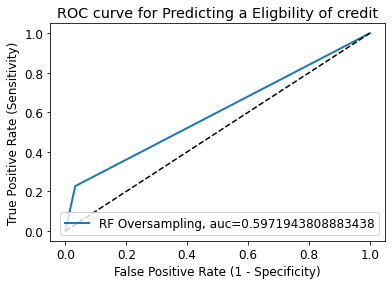

Model Name : RF SMOTE
Train Accuracy :1.00000
Test Accuracy :0.86965
Train AUC : 1.00000
Test AUC : 0.65378
Train Precision : 1.00000
Test Precision : 0.31507
Train Recall : 1.00000
Test Recall : 0.39093
Train F1 : 1.00000
Test F1 : 0.34893
Confusion Matrix : 
 [[3298  300]
 [ 215  138]]




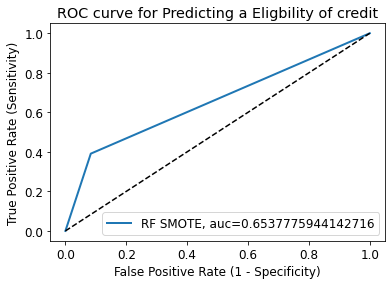

Model Name : RF ADASYN
Train Accuracy :1.00000
Test Accuracy :0.87041
Train AUC : 1.00000
Test AUC : 0.66058
Train Precision : 1.00000
Test Precision : 0.32135
Train Recall : 1.00000
Test Recall : 0.40510
Train F1 : 1.00000
Test F1 : 0.35840
Confusion Matrix : 
 [[3296  302]
 [ 210  143]]




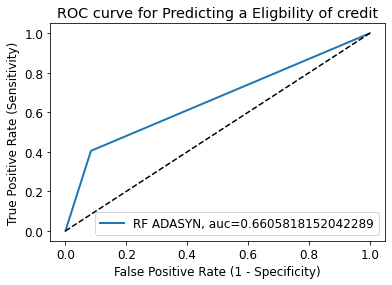

In [132]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

In [133]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
9,RF ADASYN,0.870413,0.660582,0.321348,0.405099,0.358396
6,RF Undersampling,0.744875,0.767945,0.230896,0.796034,0.357962
8,RF SMOTE,0.869653,0.653778,0.315068,0.390935,0.348925
7,RF Oversampling,0.901544,0.597194,0.408163,0.226629,0.291439
4,LR ADASYN,0.575804,0.653398,0.142626,0.747875,0.239564
3,LR SMOTE,0.573526,0.652148,0.141935,0.747875,0.238590
1,LR Undersampling,0.548469,0.639668,0.135135,0.750708,0.229041
2,LR Oversampling,0.507213,0.623403,0.126523,0.764873,0.217129
5,RF imbalance,0.910656,0.551099,0.500000,0.113314,0.184758
0,LR imbalance,0.903569,0.510161,0.220000,0.031161,0.054591
